In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.random.set_seed(55)
import pandas as pd
import time

In [2]:
mnist = tf.keras.datasets.mnist
(x_train_org, y_train),(x_test_org, y_test) = mnist.load_data()
print(x_train_org.shape, x_test_org.shape)
print(y_train, y_train.shape)

nb_classes = 10
Y_one_hot = tf.one_hot(y_train, nb_classes)
y_train = tf.transpose(tf.reshape(Y_one_hot, [-1, nb_classes]))
y_test = tf.transpose(tf.reshape(tf.one_hot(y_test, nb_classes), [-1, nb_classes]))
y_train, y_test = np.asarray(y_train), np.asarray(y_test)

(60000, 28, 28) (10000, 28, 28)
[5 0 4 ... 5 6 8] (60000,)


In [3]:
m_train = x_train_org.shape[0]
num_px = x_train_org.shape[1]
m_test = x_test_org.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("x_train_orig shape: " + str(x_train_org.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test_orig shape: " + str(x_train_org.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: 60000
Number of testing examples: 10000
Each image is of size: (28, 28, 3)
x_train_orig shape: (60000, 28, 28)
y_train shape: (10, 60000)
x_test_orig shape: (60000, 28, 28)
y_test shape: (10, 10000)


In [4]:
#Reshape the training and test examples
x_train_flatten = x_train_org.reshape(x_train_org.shape[0], -1).T
x_test_flatten = x_test_org.reshape(x_test_org.shape[0], -1).T

x_train, x_test = x_train_flatten/255., x_test_flatten/255.

print ("train_x's shape: " + str(x_train.shape))
print ("test_x's shape: " + str(x_test.shape))

train_x's shape: (784, 60000)
test_x's shape: (784, 10000)


In [5]:
n_x = 784 # num_pix(28) * num_pix
n_h = 7
n_y = 10
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.01

In [ ]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(55)
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

In [7]:
parameters = initialize_parameters_deep([784, 7, 4, 5, 10])
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))
parameters.keys()

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4'])

In [8]:
#activation functions
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A


def relu(Z):
    A = np.maximum(0, Z)
    assert(A.shape == Z.shape)
    return A


def leakyRelu(Z):
    A = np.maximum(0.1 * Z, Z)
    assert(A.shape == Z.shape)
    return A
    
    
def softmax(Z):
    t = np.exp(Z)
    t = t / t.sum(axis=0, keepdims=True)
    return t


def tanh(Z):
    A = (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
    return A
    
    
def swish(Z):
    A = Z * sigmoid(Z)
    return Z




In [9]:
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    return Z

In [10]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z = linear_forward(A_prev, W, b)
        A = sigmoid(Z)
       
    elif activation == "relu":
        Z = linear_forward(A_prev, W, b)
        A = relu(Z)
        
    elif activation == "leakyRelu":
        Z = linear_forward(A_prev, W, b)
        A = leakyRelu(Z)
        
    elif activation == "softmax":
        Z = linear_forward(A_prev, W, b)
        A = softmax(Z)
        
    elif activation == "tanh":
        Z = linear_forward(A_prev, W, b)
        A = tanh(Z)
    
    elif activation == "swish":
        Z = linear_forward(A_prev, W, b)
        A = swish(Z)
        
#     assert(Z.shape == (W.shape[0], A.shape[1]))
#     assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    cache = (A_prev, W, b, Z)

    return A, cache

In [11]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2 
    
    # Hidden layers 1 to L-1 will be relu
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], activation = "relu")
        caches.append(cache)
    
    #output layer L will be softmax
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], activation = "softmax")
    caches.append(cache)
    
    assert(AL.shape == (10, X.shape[1]))
    
    return AL, caches

In [12]:
AL, caches = L_model_forward(x_train, parameters)
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame(AL[:, 0:10])

,0,1,2,3,4,5,6,7,8,9
0,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000
1,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000
2,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000
3,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000
4,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000
5,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000
6,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000
7,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000
8,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000
9,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000


In [13]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(np.multiply(Y, np.log(AL)))    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [14]:
compute_cost(AL, y_train)

2.3025850823907708

In [15]:
def linear_backward(dZ, A_prev, W, b):
    m = A_prev.shape[1]

    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [16]:
def relu_backward(dA, cache):
    A_prev, W, b, Z = cache
    
    # Compute dZ
    dZ = np.array(dA, copy=True) # convert dz to a numpy array
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    
    # Compute dA_prev, dW, db
    dA_prev, dW, db = linear_backward(dZ, A_prev, W, b)
    return dA_prev, dW, db

def softmax_backward(AL, Y, cache):
    A_prev, W, b, Z = cache
    
    # Compute dZ
    dZ = AL - Y
    
    # Compute dA_prev, dW, db
    dA_prev, dW, db = linear_backward(dZ, A_prev, W, b)
    return dA_prev, dW, db

In [17]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    #Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Backpropagation at layer L-1
    # The activation is softmax at layer L-1
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = softmax_backward(AL, Y, current_cache)
    
    # Backpropagation from layers L-2 to 1
    # The activations are relu at all these layers
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = relu_backward(grads["dA" + str(l+1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [18]:
grads = L_model_backward(AL, y_train, caches)
grads.keys()

dict_keys(['dA3', 'dW4', 'db4', 'dA2', 'dW3', 'db3', 'dA1', 'dW2', 'db2', 'dA0', 'dW1', 'db1'])

In [19]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    
    return parameters

In [20]:
parameters = update_parameters(parameters, grads, learning_rate=0.0075)
AL, caches = L_model_forward(x_train, parameters)
pd.DataFrame(AL[:, 0:5])

,0,1,2,3,4
0,0.10000,0.10000,0.10000,0.10000,0.10000
1,0.10001,0.10001,0.10001,0.10001,0.10001
2,0.10000,0.10000,0.10000,0.10000,0.10000
3,0.10000,0.10000,0.10000,0.10000,0.10000
4,0.10000,0.10000,0.10000,0.10000,0.10000
5,0.09999,0.09999,0.09999,0.09999,0.09999
6,0.10000,0.10000,0.10000,0.10000,0.10000
7,0.10000,0.10000,0.10000,0.10000,0.10000
8,0.10000,0.10000,0.10000,0.10000,0.10000
9,0.10000,0.10000,0.10000,0.10000,0.10000


In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(55)
    costs = []      
    
    # 1. initialize parameters
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):

        # 2. Forward Propagation
        AL, caches = L_model_forward(X, parameters)
        
        # 3. Compute cost
        cost = compute_cost(AL, Y)
        
        # 4. Backward Propagation
        grads = L_model_backward(AL, Y, caches)
        
        # 5. Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 10 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [22]:
def predict(X, parameters):
    # Forward propagation
    probabilities, caches = L_model_forward(X, parameters)
    
    # Calculate Predictions (the highest probability for a given example is coded as 1, otherwise 0)
    predictions = (probabilities == np.amax(probabilities, axis=0, keepdims=True))
    predictions = predictions.astype(float)

    return predictions, probabilities

def evaluate_prediction(predictions, Y):
    m = Y.shape[1]
    predictions_class = predictions.argmax(axis=0).reshape(1, m)
    Y_class = Y.argmax(axis=0).reshape(1, m)
    
    return np.sum((predictions_class == Y_class) / (m))

Cost after iteration 0: 2.302628
Cost after iteration 100: 2.291210
Cost after iteration 200: 2.072176
Cost after iteration 300: 1.513030
Cost after iteration 400: 1.220055


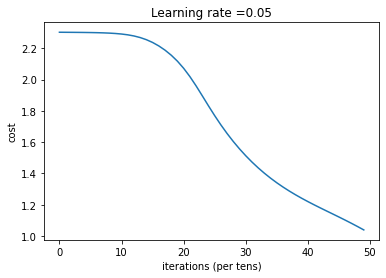

Train set error is: 0.6861333333333335
Test set error is: 0.6961000000000002


In [25]:
layers_dims = [784, 5, 10]
parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate = 0.05, num_iterations = 500, print_cost=True)
pred_train, probs_train = predict(x_train, parameters)
print("Train set error is: " + str(evaluate_prediction(pred_train, y_train)))
pred_test, probs_test = predict(x_test, parameters)
print("Test set error is: " + str(evaluate_prediction(pred_test, y_test)))

Cost after iteration 0: 2.302586
Cost after iteration 100: 2.302324
Cost after iteration 200: 2.302110
Cost after iteration 300: 2.301935
Cost after iteration 400: 2.301792


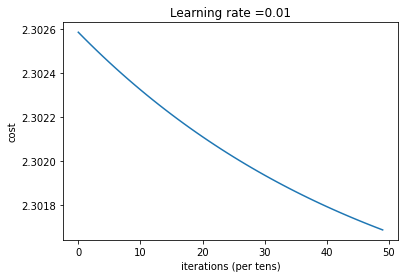

Train set error is: 0.11236666666666668
Test set error is: 0.1135


In [23]:
layers_dims = [784, 10, 3, 10]
parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate = 0.01, num_iterations = 500, print_cost=True)
pred_train, probs_train = predict(x_train, parameters)
print("Train set error is: " + str(evaluate_prediction(pred_train, y_train)))
pred_test, probs_test = predict(x_test, parameters)
print("Test set error is: " + str(evaluate_prediction(pred_test, y_test)))

Cost after iteration 0: 2.302586
Cost after iteration 100: 2.302324
Cost after iteration 200: 2.302110
Cost after iteration 300: 2.301935
Cost after iteration 400: 2.301792


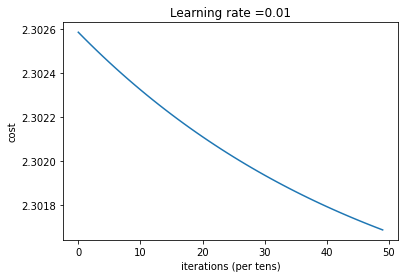

Train set error is: 0.11236666666666668
Test set error is: 0.1135


In [26]:
layers_dims = [784, 10, 3, 10]
parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate = 0.01, num_iterations = 500, print_cost=True)
pred_train, probs_train = predict(x_train, parameters)
print("Train set error is: " + str(evaluate_prediction(pred_train, y_train)))
pred_test, probs_test = predict(x_test, parameters)
print("Test set error is: " + str(evaluate_prediction(pred_test, y_test)))

Cost after iteration 0: 2.302507
Cost after iteration 100: 2.301818
Cost after iteration 200: 2.300780
Cost after iteration 300: 2.298799
Cost after iteration 400: 2.294636


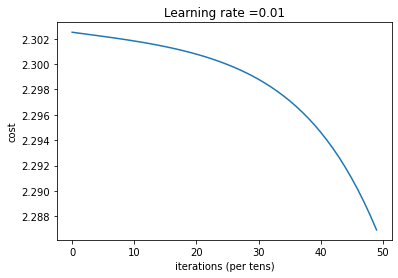

Train set error is: 0.31853333333333345
Test set error is: 0.31560000000000005


In [28]:
layers_dims = [784, 2, 10]
parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate = 0.01, num_iterations = 500, print_cost=True)
pred_train, probs_train = predict(x_train, parameters)
print("Train set error is: " + str(evaluate_prediction(pred_train, y_train)))
pred_test, probs_test = predict(x_test, parameters)
print("Test set error is: " + str(evaluate_prediction(pred_test, y_test)))